In [62]:
from society.agents import VectorisedAgent, AnalyticalAgent,IterativeAgent
from society.structure import AgentNetwork
from society.beliefs import Distribution, BeliefDistribution
from society.structure.network import RealNetwork, ArtificialNetwork
from updates import Interactions
from updates import UpdateRule
from simulation import Simulation, Insights
from computations.insights.relative import disagreement
from plotting.basic import *
from plotting.summaries import *
from matplotlib import pyplot as plt
from computations.probabilistic.vectorised import *

# Set initial opinions distribution

In [63]:
linespace = Distribution(type="linespace", range=(-1,1))
unique = Distribution(type="unique", value=0.1)
belief_distribution = BeliefDistribution(trust_distribution=unique, uncertainty_distribution=unique, mean_distribution=linespace)

# Set agent network

In [64]:
network = RealNetwork("Google+")
agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)
len(agent_network.network.G.edges())

39285

# Set update rule an define interactions

In [65]:
update_rule = UpdateRule(evaluation_bias=0.1, assimilation_bias=0, rewire_probability=0, tolerance=0.2)
interactions = Interactions(update_rule, interacting_agents=True)

# Run simulation to get desired insights

In [66]:
insights = Insights()
simulation = Simulation(1000, insights)

In [67]:
simulation.run(interactions, agent_network)

100%|██████████| 1000/1000 [01:52<00:00,  8.86it/s]


/Users/martinprieto/Desktop/New_Honours_Refactored/plotting/basic.py:38: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.imshow(heat_map.T, aspect="auto", origin="lower", cmap='inferno')


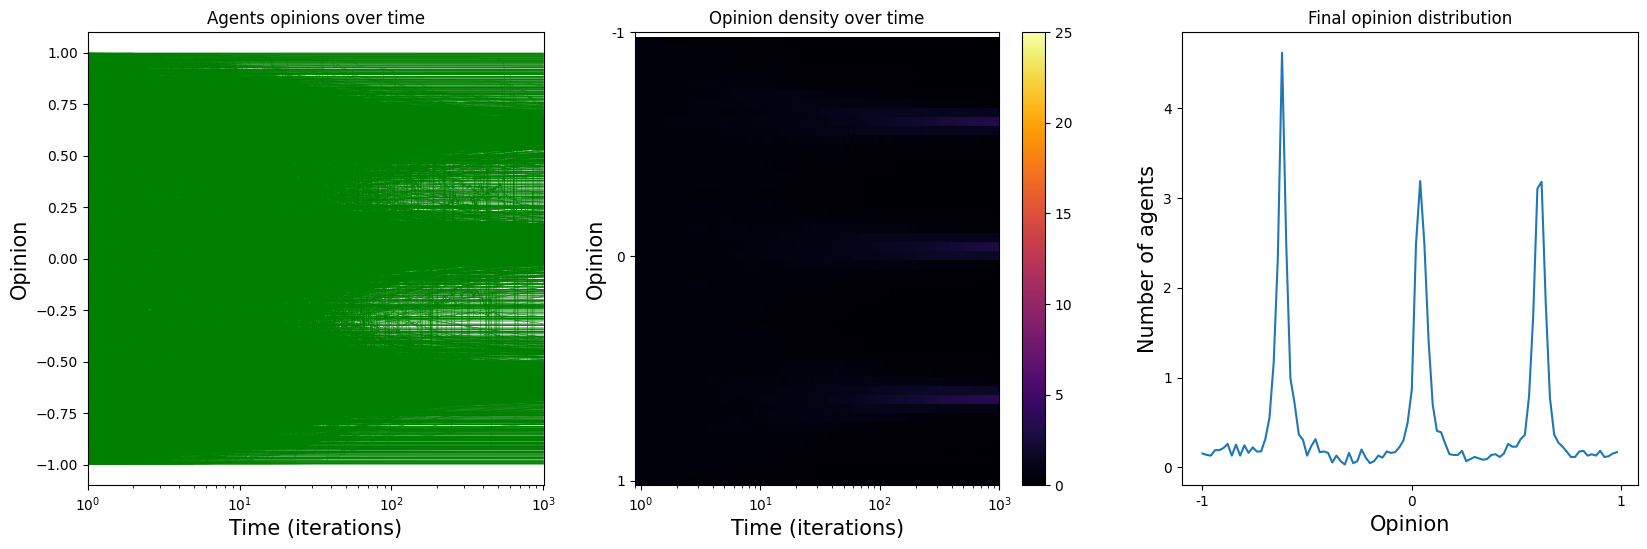

In [68]:
plot_dynamics_sumary(simulation.insights.belief_evolution)